# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [20]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,2.0,3.0,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,2.0,3.0,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,2.0,3.0,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,2.0,3.0,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,2.0,3.0,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


** Quntas linhas e colunas o conjunto de dados possui? Quais os tipos deas variáveis? **

In [21]:
# Tamanho do Dataframe:
print(f'Número de linhas: {len(df.index)}')
print(f'Número de colunas: {len(df.columns)}\n')

# Identificando o tipo de cada variável:
display(df.dtypes)

Número de linhas: 27716
Número de colunas: 24



Chutes a gol 1         float64
Chutes a gol 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Defesas difíceis 1     float64
Defesas difíceis 2     float64
Posse 1(%)             float64
Posse 2(%)             float64
Time 1                  object
Time 2                  object
Position 1              object
Position 2              object
dtype: object

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

In [27]:
df_copy = df.copy()

Começaremos verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [25]:
# Verificando valores duplicados em todas as 40 colunas
duplicadas = df.duplicated()

# Contar quantas linhas duplicadas existem
print(f'Número de linhas duplicadas: {duplicadas.sum()}')

# Ver as linhas duplicadas
linhas_duplicadas = df[duplicadas]
print(linhas_duplicadas)


Número de linhas duplicadas: 12
       Chutes a gol 1  Chutes a gol 2  Escanteios 1  Escanteios 2  \
10172             5.0             5.0           3.0           7.0   
18061             2.0             3.0           6.0           1.0   
18141             4.0             3.0           3.0           5.0   
18203             3.0             4.0           4.0           2.0   
18222            10.0             2.0          12.0           2.0   
18249             6.0             4.0          12.0           1.0   
18315             2.0             3.0           2.0           8.0   
18348             2.0             3.0           4.0          11.0   
18384             5.0             3.0           5.0           5.0   
19009             6.0             1.0          10.0           4.0   
21960             0.0             1.0           5.0           4.0   
23270             3.0             2.0           3.0           9.0   

       Chutes fora 1  Chutes fora 2  Faltas 1  Faltas 2  Cartões amare

Bom, infelizmente temos registros duplicados, portanto, precisamos remover essas entradas duplicadas e manter apenas uma linha por partida.


Descrever o método usado aqui ...

### Mudando o tipo de variável das colunas
Descrever aqui o tratamento das colunas Positions 1 e 2.

### Tratando Outliers

Descrever a importancia de tracar outliers aqui, como foi feito e justificar a escolha do método. 


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [ ]:
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df_copy.dtypes)

Chutes a gol 1         0.0
Chutes a gol 2         0.0
Escanteios 1           0.0
Escanteios 2           0.0
Chutes fora 1          0.0
Chutes fora 2          0.0
Faltas 1               0.0
Faltas 2               0.0
Cartões amarelos 1     0.0
Cartões amarelos 2     0.0
Cartões vermelhos 1    0.0
Cartões vermelhos 2    0.0
Contra-ataques 1       0.0
Contra-ataques 2       0.0
Gols 1                 0.0
Gols 2                 0.0
Defesas difíceis 1     0.0
Defesas difíceis 2     0.0
Posse 1(%)             0.0
Posse 2(%)             0.0
Time 1                 0.0
Time 2                 0.0
Position 1             0.0
Position 2             0.0
dtype: float64
Chutes a gol 1         float64
Chutes a gol 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    floa

Considerando que as variáveis Gols 1 e 2 são as mais importantes para definir o resultado de um jogo, vamos estudar a correlação entre Gols 1 e 2 e as variáveis com mais de 10% de NaN para a partir disso quais iremos excluir. A coorelação pode ser vista tanto na atbela quanto no gráfico abaixo.

Correlação com Gols 1:


Series([], Name: Gols 1, dtype: float64)


Correlação com Gols 2:


Series([], Name: Gols 2, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

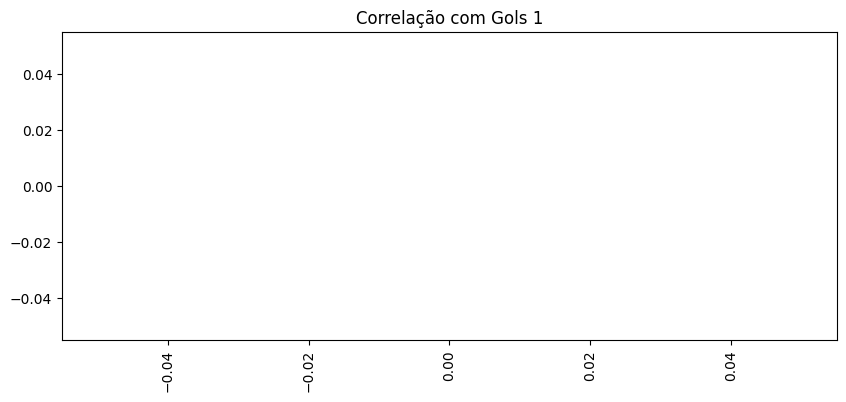

In [23]:
# Selecionar só as colunas com muitos NaNs
na_maiores_10 = df.columns[df.isnull().mean() > 0.1]

# Juntar com Gols 1 e Gols 2 para estudar correlação
colunas_para_estudo = list(na_maiores_10) + ['Gols 1', 'Gols 2']

# Criar uma cópia só com essas
estudo = df[colunas_para_estudo]

# Calcular correlação entre essas variáveis
correlacoes = estudo.corr(numeric_only=True)

# Visualizar a correlação com Gols 1 e Gols 2
cor_gols1 = correlacoes['Gols 1'].drop(['Gols 1', 'Gols 2'])
cor_gols2 = correlacoes['Gols 2'].drop(['Gols 1', 'Gols 2'])

# Mostrar ordenado
print("Correlação com Gols 1:")
display(cor_gols1.sort_values(ascending=False))

print("\nCorrelação com Gols 2:")
display(cor_gols2.sort_values(ascending=False))

cor_gols1.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 1', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()


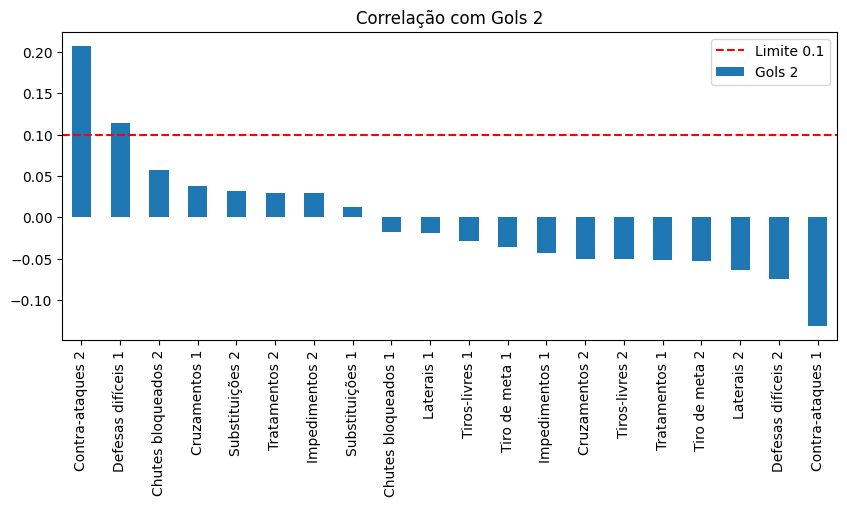

In [ ]:
cor_gols2.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 2', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()

Baseado nas correlações apresentadas, algumas variáveis demonstram baixa relação com os gols marcados por cada time (Gols 1 e Gols 2), o que indica que elas podem ter pouca relevância na previsão de resultados. 

**O que os números significam?**  
Correlação próxima de 1 indica uma forte relação positiva (ex: quanto mais daquela variável, mais gols são marcados). Correlação próxima de -1 indica uma forte relação negativa (ex: quanto mais daquela variável, menos gols). Já valores próximos de 0 sugerem que não há relação clara.  
Na prática, em bases de dados reais (ou seja, com variações naturais, erros de entrada, valores ausentes — o chamado *ruído*), correlações acima de ±0.1 já podem indicar alguma influência, sendo este um valor de corte comumente utilizado em análises exploratórias para triagem de variáveis.

Com base nesse critério, e levando em conta que muitas dessas variáveis também possuem mais de 10% de valores ausentes (o que agrava a irrelevância), as seguintes variáveis foram selecionadas para descarte:

Laterais 1
Laterais 2
Tiros-livres 1
Tiros-livres 2
Tiro de meta 1
Tiro de meta 2
Substituições 1
Substituições 2
Cruzamentos 1
Cruzamentos 2
Tratamentos 1
Tratamentos 2
Chutes bloqueados 1
Chutes bloqueados 2
Impedimentos 1
Impedimentos 2

Essas variáveis possuem correlação inferior a ±0.1 com os gols dos respectivos times e podem ser eliminadas para reduzir a dimensionalidade do modelo. No entanto, vale destacar que uma variável pode ser mantida caso tenha justificativa contextual, por exemplo, se o conhecimento do domínio esportivo indicar uma possível influência indireta nos resultados.


In [ ]:
colunas_para_dropar = [
    'Laterais 1', 'Laterais 2',
    'Tiros-livres 1', 'Tiros-livres 2',
    'Tiro de meta 1', 'Tiro de meta 2',
    'Substituições 1', 'Substituições 2',
    'Cruzamentos 1', 'Cruzamentos 2',
    'Tratamentos 1', 'Tratamentos 2',
    'Chutes bloqueados 1', 'Chutes bloqueados 2',
    'Impedimentos 1', 'Impedimentos 2'
]

# Confirma quais colunas realmente existem no DataFrame
colunas_existentes = [col for col in colunas_para_dropar if col in df.columns]

# Agora sim remove só as que existem
df = df.drop(columns=colunas_existentes)

df.head()


,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [ ]:
df.shape

(27716, 24)

Na etapa de tratamento de dados faltantes, optamos pela imputação utilizando a mediana como estratégia principal. Embora existam diferentes métodos, como a substituição pela média, a mediana se destaca por sua robustez. Independentemente de a distribuição dos dados em uma variável ser simétrica ou assimétrica, a mediana tende a ser menos influenciada por valores extremos (outliers) e por possíveis desvios na distribuição. 

A imputação pela moda (categoria mais frequente) foi escolhida para substituir os valores faltantes nas colunas categóricas, como Time 1, Time 2, Position 1 e Position 2, pois assume que a categoria mais recorrente tem uma maior probabilidade de representar os dados ausentes e é onde a imputação de valores numéricos não seria adequada.

In [ ]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df[col].median()           # Calcula a mediana da coluna 
        df[col] = df[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df:
    if(tabelaPorcentagem[coluna] < porcentagem and df.dtypes[coluna] == 'float64'):

      col_median=df[coluna].median()

      df[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df['Position 1'].mode()[0],df['Position 2'].mode()[0]
    df['Position 1']=df['Position 1'].fillna(modaP1)
    df['Position 2']=df['Position 2'].fillna(modaP2)
    return df

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df.isnull().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Contra-ataques 1       0
Contra-ataques 2       0
Gols 1                 0
Gols 2                 0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64
